In [1]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import Eg_cov as egcov
import joint_cov as jp

Set up parameters etc

In [2]:
lens = 'DESI'
src = 'LSST'
rp0 = 1.5
Pimax=100.
rp_bin_edges = np.logspace(np.log10(rp0), np.log10(50.), 11)
endfilename='test_scales'
rp_bin_c = u.rp_bins_mid(rp_bin_edges)
params = {'sigma8':0.83,'b':2.2,'OmB':0.05, 'h':0.68, 'n_s':0.96, 'OmM': 0.3, 'mu_0': 0., 'sigma_0':0.}
Nsamps=100000

Get data covariance matrices for E_G and the joint probes case.

In [3]:
#Dcov_jp = jp.get_joint_covariance(params, lens, src, rp_bin_edges, rp_bin_c, rp0, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_jp_'+endfilename+'.txt', Dcov_jp)
Dcov_jp = np.loadtxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_jp_'+endfilename+'.txt')

In [4]:
#Dcov_eg = egcov.get_egcov(params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_eg_'+endfilename+'.txt', Dcov_eg)
Dcov_eg = np.loadtxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_eg_'+endfilename+'.txt')

Get the linear and nonlinear datavector for E_G

In [5]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False)
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True)

pyfftlog.py:442: RuntimeWarning: divide by zero encountered in log
  zp = np.log(gamma(xp + y))
pyfftlog.py:443: RuntimeWarning: divide by zero encountered in log
  zm = np.log(gamma(xm + y))
pyfftlog.py:136: RuntimeWarning: divide by zero encountered in log
  zp = np.log(gamma(xp + 1j*y))


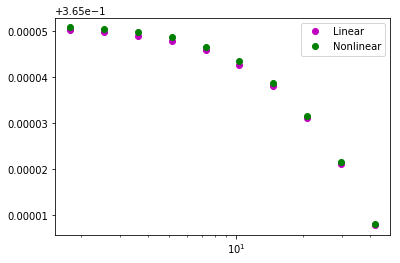

In [6]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_EG, 'mo', label='Linear')
plt.semilogx(rp_bin_c, data_nl_EG, 'go', label='Nonlinear')
plt.legend()
plt.show()

Now get the linear and nonlinear data vectors for the joint probes case

In [7]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False)
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True)

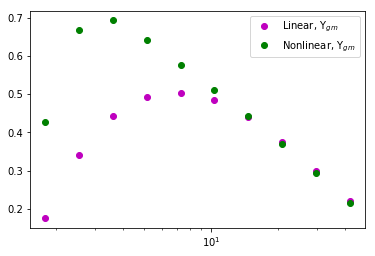

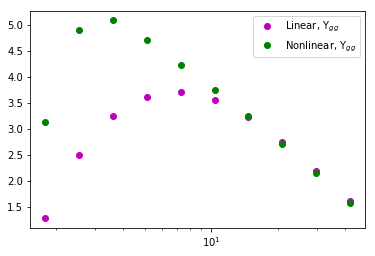

beta, lin= 0.3735464303321457
beta, nl= 0.3735464303321457


In [8]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\Upsilon_{gm}$')
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.semilogx(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\Upsilon_{gg}$')
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print "beta, lin=", data_lin_jp[-1]
print "beta, nl=", data_nl_jp[-1]

Get scale cuts for Eg

In [9]:
cut_inds_Eg = u.linear_scale_cuts(data_nl_EG, data_lin_EG, Dcov_eg, rp_bin_c)

In [10]:
print "cut indices=", cut_inds_Eg

cut indices= []


For $E_G$, we are nearly totally insensitive to nonlinearities, so we do not find we need to cut any scales.

In [11]:
cut_inds_jp = u.linear_scale_cuts(data_nl_jp, data_lin_jp, Dcov_jp, rp_bin_c)

In [12]:
print "cut indices=", cut_inds_jp

cut indices= [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18]


For joint probes, we disect this to find the elements to cut for individual probes.

In [13]:
cut_indices_gm = [ind for ind in cut_inds_jp if ind<len(rp_bin_c)]
ind_keep_gm = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gm]
rp_keep_gm = rp_bin_c[ind_keep_gm]
Ups_keep_gm = data_nl_jp[ind_keep_gm]
print zip(rp_keep_gm, Ups_keep_gm)

cut_indices_gg = [(ind-10) for ind in cut_inds_jp if ind>=len(rp_bin_c)]
ind_keep_gg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
ind_keep_gg_dvec = [ind+10 for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
rp_keep_gg = rp_bin_c[ind_keep_gg]
Ups_keep_gg = data_nl_jp[ind_keep_gg_dvec]
print zip(rp_keep_gg, Ups_keep_gg)

[(14.654211101598804, 0.4429661589274988), (41.959090612203354, 0.21639526038084556)]
[(14.654211101598804, 3.248531908532915), (41.959090612203354, 1.5870867075894657)]


Plot the data points this tells us to keep for joint probes (not many)

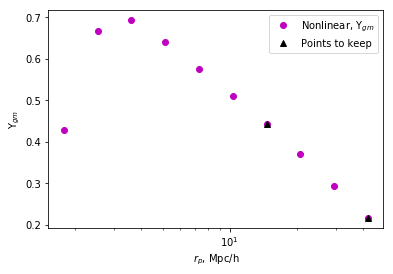

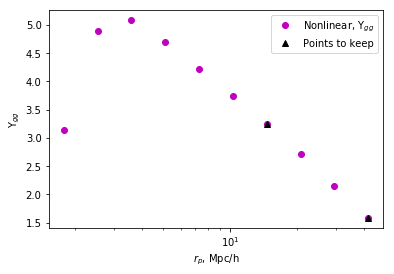

In [17]:
plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'mo', label='Nonlinear, $\Upsilon_{gm}$')
plt.semilogx(rp_keep_gm, Ups_keep_gm, 'k^', label='Points to keep')
plt.ylabel('$\Upsilon_{gm}$')
plt.xlabel('$r_p$, Mpc/h')
plt.legend()
plt.savefig('../plots/Upsilon_gm_scales.png')

plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Nonlinear, $\Upsilon_{gg}$')
plt.semilogx(rp_keep_gg, Ups_keep_gg, 'k^', label='Points to keep')
plt.ylabel('$\Upsilon_{gg}$')
plt.xlabel('$r_p$, Mpc/h')
plt.legend()
plt.savefig('../plots/Upsilon_gg_scales.png')